# You have some data... now what?

Usually, you want to spend some time **exploring the data**. This can include a bunch of things:
- **Sanity checks**: does the data include the columns you're expecting? How are rows unique? Are there duplicates?
- **Hunting for patterns and outliers**: Are there any? What do they look like?
- **Some descriptive statistics** (mean, standard deviation, histograms)
And just generally getting to know your data!

You can do a lot of this with `pandas`, but pictures contain $\infty$ words, so now's the time to introduce our visualization tools!

## Next tool: `matplotlib`

![matplotlib logo](imgs/matplotlib_logo.png)

[`matplotlib`](https://matplotlib.org/) is one of the most popular plotting libraries in the Python data science stack. You may find people using [`seaborn`](https://seaborn.pydata.org/) or [`bokeh`](https://bokeh.pydata.org/en/latest/), and definitely explore those and other options, but `matplotlib` is the "default" plotting library.

However, `matplotlib`'s documentation is... not super friendly. (Unless you have experience [MATLAB](https://www.mathworks.com/products/matlab.html), in which case it may be familiar to you.) You can get a handle on it by keeping the following in mind:
- The basic call for a `matplotlib` chart is `plt.plot(x, y)`.
- `plt.plot()` doesn't always display the plot, though. Instead, it instantiates a matplotlib pyplot object.
- You can explicitly display the object with `plt.show()`.
- You can modify the object's attributes - e.g. the range of the x- and y-scales, the title, the x- and y-axis labels. For example, to change the title, you can do `plt.plot(x, y)`, then `plt.title("My cool chart title")` and then `plt.show()`!

Here's a good [walkthrough of the object-ness of `matplotlib` charts, and how to use it well](http://pbpython.com/effective-matplotlib.html), and [another one](https://realpython.com/blog/python/python-matplotlib-guide/). No need to go through these now, though! You can get pretty far with just the tips above!

In [22]:
# Tell Jupyter to display matplotlib plots in your notebook (rather than as popups)
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Let's resize all our charts to be a bit bigger
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)

# matplotlib has certain default styles that you can specify at the top of your notebook
# https://matplotlib.org/users/style_sheets.html
# Here, I use the 'bmh' style - just a personal preference!
plt.style.use('bmh')

### Back to the Greeks

Let's explore the Duke Greek life dataset.

In [2]:
# Loading the Greek life data
df = pd.read_csv('data/duke-greek-life.csv')
print(df.shape)
df.head()

(1739, 16)


,Greek Council,Greek Organization,Home City,Home State,Home Country,Latitude of Home City,Longitude of Home City,Free and reduced percentage of High School,Public or Private High School,Domestic or International High School,Boarding/Day High School,Religous High School?,Gender of High School's Students,Tuition of High School,Sports Team,Merit Scholarship
0,None,None,Accokeek,Maryland,United States,38.667617,-77.028309,Data not available,private,Domestic,Day,Episcopal,Co-Ed,36610,None,None
1,None,None,Advance,North Carolina,United States,35.941248,-80.409222,0.34741523,public,Domestic,Day,Unafilliated,Co-Ed,0,Fooball,None
2,None,None,Ajman,NaN,United Arab Emirates,25.509129,55.361907,NaN,private,International,Day,Unafilliated,Co-Ed,13093.46,None,None
3,None,None,Alameda,California,United States,37.609029,-121.899142,0.2268,public,Domestic,Day,Unafilliated,Co-Ed,0,None,None
4,None,None,Albuquerque,New Mexico,United States,35.084103,-106.650985,Data not available,private,Domestic,Day,Unafilliated,Co-Ed,22870,None,None


 I don't really know anything about Duke or its Greek life, so I have a bunch of questions:
- How many students are in a Greek organization?
- What's the distribution of high school tuitions? (Do Duke students go to fancy high schools?)
- How many had a merit scholarship?
- Where are students from?

In [3]:
df['Greek Organization'].value_counts()

None                   1150
Gamma Phi Beta           39
Kappa Alpha Theta        37
Alpha Delta Pi           34
Zeta Tau Alpha           33
Pi Beta Phi              33
Delta Delta Delta        32
Kappa Kappa Gamma        32
Alpha Phi                30
Delta Sigma Phi          29
Sigma Phi Epsilon        27
Pi Kappa Phi             26
Alpha Tau Omega          25
Chi Omega                25
Delta Gamma              25
Delta Tau Delta          24
Pi Kappa Alpha           21
Kappa Alpha Order        20
Alpha Epsilon Pi         20
Sigma Nu                 17
Sigma Alpha Epsilon      16
Sigma Chi                11
Kappa Sigma              11
Chi Psi                  10
Alpha Delta Phi           6
Delta Kappa Epsilon       3
Psi Upsilon               3
Name: Greek Organization, dtype: int64

In [4]:
# How many Greek orgs are there?
df['Greek Organization'].nunique() - 1

26

In [5]:
# What percentage of students are in a Greek org?
len(df[df['Greek Organization'] != "None"]) / len(df)

0.33870040253018974

In [6]:
# What's the distribution of high school tuitions?
df['Tuition of High School'].describe()

count     1695
unique     394
top          0
freq      1059
Name: Tuition of High School, dtype: object

#### Ah ha! Our first data cleaning

High school tuition sounds like it should be a **numeric** column, but the `dtype` above is `object`. (That is, `pandas` thinks that column is a string.) Why? 

Let's try to make it numeric with `pandas`'s method, `to_numeric()`:

In [8]:
pd.to_numeric(df['Tuition of High School'])

ValueError: Unable to parse string "16,600" at position 451

The comma in "16,600" is the problem. Let's try to correct it and see if that helps.

In [10]:
df['Tuition of High School'].replace(to_replace="16,600", value="16600", inplace=True)
pd.to_numeric(df['Tuition of High School'])

ValueError: Unable to parse string "1,094.79" at position 829

Hmmm. Still not finished. Also, it's probably not efficient to manually correct for every comma in every column. We can use a shortcut - Python's string methods! These are also available to us in `pandas`:

In [12]:
pd.to_numeric(df['Tuition of High School'].str.replace(',',''))

0       36610.00
1           0.00
2       13093.46
3           0.00
4       22870.00
5       22870.00
6       22870.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13      14170.00
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19      26670.00
20          0.00
21          0.00
22          0.00
23       5450.21
24      20000.00
25      20000.00
26          0.00
27          0.00
28       9494.00
29      15000.00
          ...   
1709        0.00
1710    21518.00
1711        0.00
1712        0.00
1713        0.00
1714    21190.00
1715        0.00
1716        0.00
1717        0.00
1718        0.00
1719        0.00
1720    42830.00
1721    21350.00
1722     8300.00
1723        0.00
1724    13135.00
1725     3165.54
1726    36100.00
1727         NaN
1728         NaN
1729     5508.00
1730    23717.50
1731         NaN
1732        0.00
1733        0.00
1734     8950.00
1735         NaN
1736    58300.

That worked! But we didn't actually change the column. Instead, `pandas` just returned a new Series for us (a Series is a column in a pandas DataFrame). Let's replace the column itself:

In [13]:
df['Tuition of High School'] = pd.to_numeric(df['Tuition of High School'].str.replace(',',''))
df['Tuition of High School'].describe()

count      1695.000000
mean      10555.198232
std       16650.980438
min           0.000000
25%           0.000000
50%           0.000000
75%       20012.500000
max      118660.780000
Name: Tuition of High School, dtype: float64

Perfect! Now we can use one of `pandas`'s built-in plotting methods (yes, it has a few! they're built on top of `matplotlib`) to see a frequency histogram of this data.

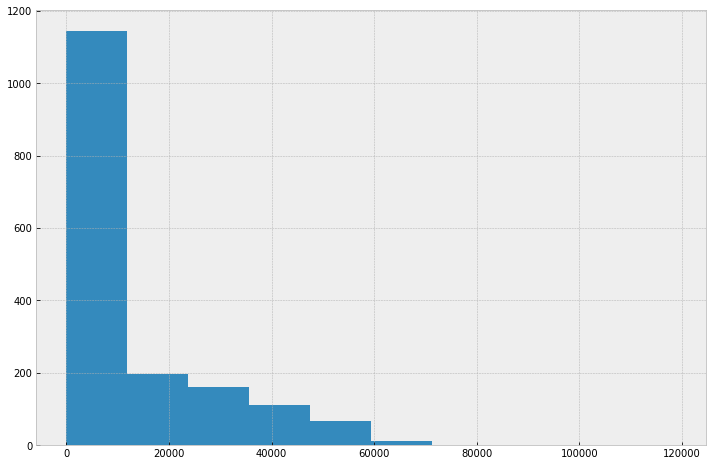

In [23]:
df['Tuition of High School'].hist()

Let's modify this. Let's add:
- More bins! I like more granular histograms.
- A vertical line for the average tuition.

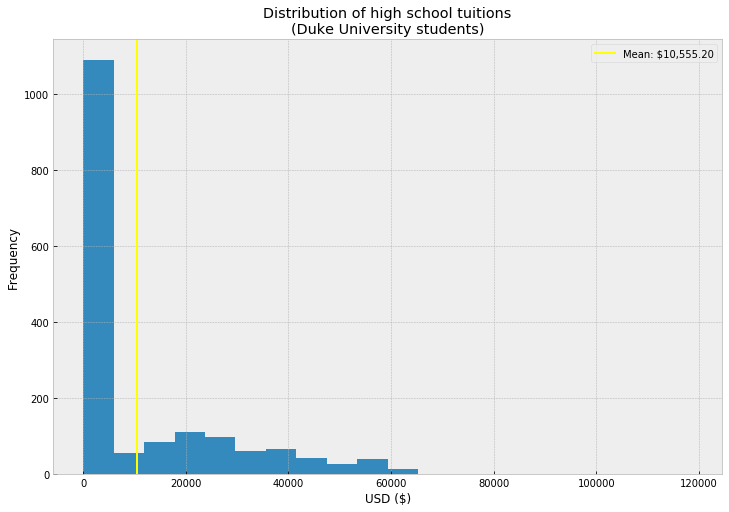

In [24]:
df['Tuition of High School'].hist(bins=20)
plt.axvline(df['Tuition of High School'].mean(), 
            color='yellow', 
            label=f"Mean: ${df['Tuition of High School'].mean():,.2f}")
plt.legend()
plt.title('Distribution of high school tuitions\n(Duke University students)')
plt.xlabel('USD ($)')
plt.ylabel('Frequency')
plt.show()